In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

%matplotlib inline

In [2]:
df = pd.read_csv("b2_experiment.csv")
df

,Unnamed: 0,ionic_strength,B2,B2_error,[NaCl],molecule,label,Mw,pH,shortdoi
0,0,0.010000,0.002577,NaN,0.010000,lysozyme,rcurtis,14300,7.0,NaN
1,1,0.011000,0.002085,NaN,0.011000,lysozyme,rcurtis,14300,7.0,NaN
2,2,0.012000,0.001788,NaN,0.012000,lysozyme,rcurtis,14300,7.0,NaN
3,3,0.014000,0.001519,NaN,0.014000,lysozyme,rcurtis,14300,7.0,NaN
4,4,0.018000,0.001127,NaN,0.018000,lysozyme,rcurtis,14300,7.0,NaN
5,5,0.020000,0.000977,NaN,0.020000,lysozyme,rcurtis,14300,7.0,NaN
6,6,0.025000,0.000663,NaN,0.025000,lysozyme,rcurtis,14300,7.0,NaN
7,7,0.030000,0.000536,NaN,0.030000,lysozyme,rcurtis,14300,7.0,NaN
8,8,0.035000,0.000396,NaN,0.035000,lysozyme,rcurtis,14300,7.0,NaN
9,9,0.040000,0.000292,NaN,0.040000,lysozyme,rcurtis,14300,7.0,NaN


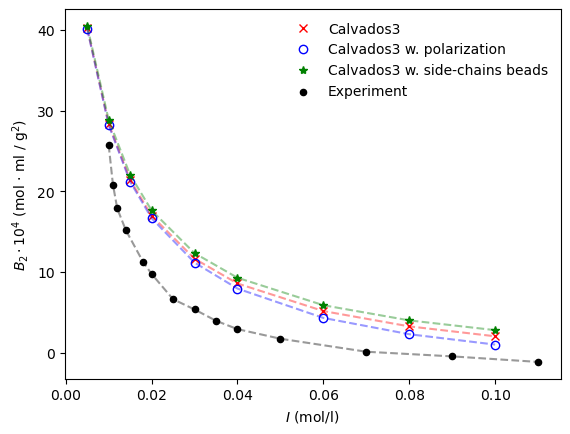

In [3]:
def plot_lysozyme(ax):
    I, B2 = np.loadtxt("lysozyme_pH7_vanilla/b2.dat", unpack=True)
    ax.plot(I / 1e3, B2 * 1e4, "rx", label="Calvados3")
    ax.plot(I / 1e3, B2 * 1e4, "r--", label=None, alpha=0.4)

    I, B2 = np.loadtxt("lysozyme_pH7_alpha/b2.dat", unpack=True)
    ax.plot(
        I / 1e3,
        B2 * 1e4,
        "bo",
        markerfacecolor="none",
        label="Calvados3 w. polarization",
    )
    ax.plot(I / 1e3, B2 * 1e4, "b--", label=None, alpha=0.4)

    I, B2 = np.loadtxt("lysozyme_pH7_sidechain/b2.dat", unpack=True)
    ax.plot(I / 1e3, B2 * 1e4, "g*", label="Calvados3 w. side-chains beads")
    ax.plot(I / 1e3, B2 * 1e4, "g--", label=None, alpha=0.4)

    sel = (df.pH == 7.0) & (df.molecule == "lysozyme")
    exp = df[sel].copy(deep=True)
    exp["B2"] = exp["B2"] * 1e4
    exp.plot(
        "ionic_strength",
        "B2",
        yerr="B2_error",
        color="k",
        kind="scatter",
        label="Experiment",
        ax=ax,
    )
    exp.plot(
        "ionic_strength", "B2", style="k--", kind="line", ax=ax, alpha=0.4, label=""
    )

    ax.set_xlabel(r"$I$ (mol/l)")
    ax.set_ylabel(r"$B_2\cdot 10^4$ (mol $\cdot$ ml / g$^2$)")
    ax.legend(frameon=False)


fig, ax = plt.subplots()
plot_lysozyme(ax)

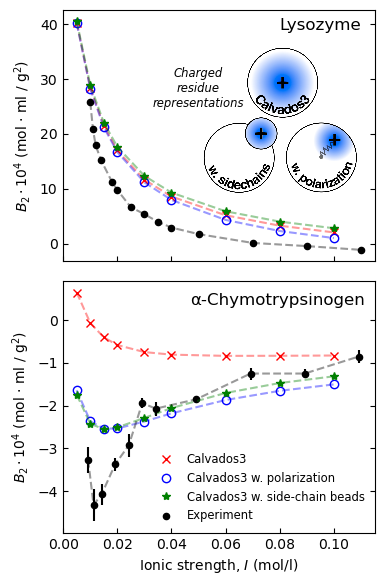

In [4]:
def plot_cgn(ax):
    I, B2 = np.loadtxt("cgn_pH7_vanilla/b2.dat", unpack=True)
    ax.plot(I / 1e3, B2 * 1e4, "rx", label="Calvados3")
    ax.plot(I / 1e3, B2 * 1e4, "r--", label=None, alpha=0.4)

    I, B2 = np.loadtxt("cgn_pH7_alpha/b2.dat", unpack=True)
    ax.plot(
        I / 1e3,
        B2 * 1e4,
        "bo",
        markerfacecolor="none",
        label="Calvados3 w. polarization",
    )
    ax.plot(I / 1e3, B2 * 1e4, "b--", label=None, alpha=0.4)

    I, B2 = np.loadtxt("cgn_pH7_sidechain/b2.dat", unpack=True)
    ax.plot(I / 1e3, B2 * 1e4, "g*", label="Calvados3 w. side-chain beads")
    ax.plot(I / 1e3, B2 * 1e4, "g--", label=None, alpha=0.4)

    sel = (df.pH == 7.0) & (df.molecule == "α-chymotrypsinogen A")
    exp = df[sel].copy(deep=True)
    exp["B2"] = exp["B2"] * 1e4
    exp["B2_error"] = exp["B2_error"] * 1e4
    exp.plot(
        "ionic_strength",
        "B2",
        yerr="B2_error",
        color="k",
        kind="scatter",
        label="Experiment",
        ax=ax,
    )
    exp.plot(
        "ionic_strength", "B2", style="k--", kind="line", ax=ax, alpha=0.4, label=""
    )

    ax.set_xlabel(r"Ionic strength, $I$ (mol/l)")
    ax.set_ylabel(r"$B_2\cdot 10^4$ (mol $\cdot$ ml / g$^2$)")
    ax.legend(frameon=False, loc=4, fontsize="small")


fig, ax = plt.subplots(nrows=2, figsize=(4, 6), sharex=True)
plot_lysozyme(ax[0])
plot_cgn(ax[1])
ax[0].legend().set_visible(False)
plt.tight_layout()
ax[0].yaxis.set_ticks_position("both")
ax[0].tick_params(direction="in")
ax[1].yaxis.set_ticks_position("both")
ax[1].tick_params(direction="in")
ax[0].text(0.08, 39, "Lysozyme", fontsize="large")
ax[1].text(0.047, 0.35, "α-Chymotrypsinogen", fontsize="large")
# ax[0].set_xscale("log")
# ax[1].set_xscale("log")

image = Image.open("calvados-models.png")
imagebox = OffsetImage(
    image, zoom=0.13
)  # zoom scales the image while keeping aspect ratio
ab = AnnotationBbox(imagebox, (0.08, 22.5), frameon=False)  # position (x, y)
ax[0].add_artist(ab)
ax[0].text(
    0.05,
    28.2,
    "Charged\nresidue\nrepresentations",
    fontsize="small",
    fontstyle="italic",
    ha="center",
    va="center",
)
plt.savefig("lys-cgn.png", dpi=300, bbox_inches="tight")
plt.show()